# Week#4 Q&A Activity

From given 'Telco-Customer-Churn' dataset ,Carry out Visualization for the following questions:

1. Compare churn count with respect to gender. 
2. Find out how many female senior citizens there in the dataset 
3. Compare 'tenure' with 'Total Charges' 
4. Find out which contract preffered by the senior citizen. 
5. Comment on your finds on Payment Method?



In [16]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#reading 'Telco-Customer-Churn' data into a pandas dataframe from a excel file
data=pd.read_excel('Telco-Customer-Churn.xlsx')

In [18]:
#Display the columns in the dataset
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
#checking data types of each columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
#displaying  top 5  rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**1. Compare churn count with respect to gender.**

#method-1

In [22]:
#creating a new data frame with only required columns 
df=data[['gender','Churn']]

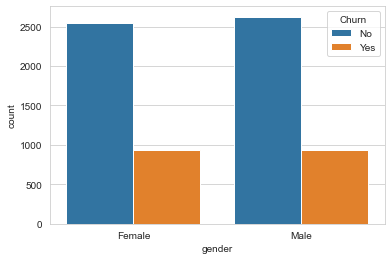

In [4]:
#Churn Count Chart with Gender 
sns.set_style("whitegrid")
sns.countplot(x="gender",hue="Churn", data=df)
plt.show()

#method-2

In [5]:
#creating a data frame with only 'churn values=yes '
df_churn=df.iloc[np.where(df.Churn.values=='Yes')]

In [6]:
df_churn.head(100)

,gender,Churn
2,Male,Yes
4,Female,Yes
5,Female,Yes
8,Female,Yes
13,Male,Yes
...,...,...
371,Male,Yes
377,Female,Yes
381,Male,Yes
383,Male,Yes


<AxesSubplot:>

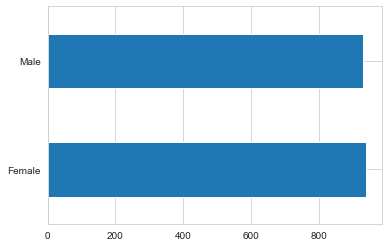

In [29]:
# Horizontal Bar graph of churn count w.r.t gender
df_churn['gender'].value_counts().plot(kind='barh')

In [30]:
#churn count with respect to gender. 
df_churn['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

Find:

The churn count  is almost equal in case of Male and Females.

**2. Find out how many female senior citizens there in the dataset**

#METHOD-1

In [37]:
seniorcitizen=data['SeniorCitizen']==1
female=data['gender']=='Female'
Female_Senior_Citizens=data[seniorcitizen & female]
FemaleSeniorCitizen=Female_Senior_Citizens[['gender']]
FemaleSeniorCitizen.count()

gender    568
dtype: int64

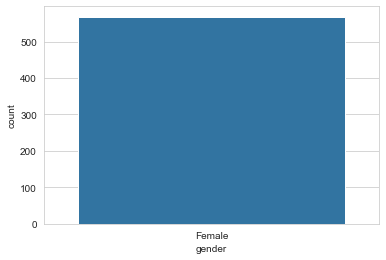

In [38]:
sns.set_style("whitegrid")
sns.countplot(x="gender", data=FemaleSeniorCitizen)
plt.show()

#method-2

In [41]:
#creating a  data frame with only required columns 
df2=data[['gender','SeniorCitizen']]
df2.head(10)

,gender,SeniorCitizen
0,Female,0
1,Male,0
2,Male,0
3,Male,0
4,Female,0
5,Female,0
6,Male,0
7,Female,0
8,Female,0
9,Male,0


In [42]:
#creating a data frame with only Senior citizens = 1 ie 'yes'
df_senior=df2.iloc[np.where(df2.SeniorCitizen.values==1)]

In [43]:
#Count of female senior citizens
df_senior.gender.value_counts().Female

568

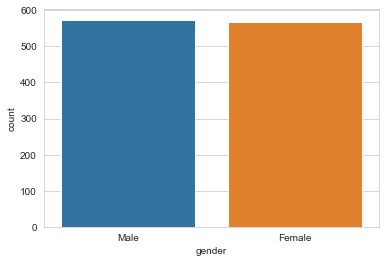

In [45]:
sns.set_style("whitegrid")
sns.countplot(x="gender", data=df_senior)
plt.show()

Find:
    
female senior citizens-568

**3. Compare 'tenure' with 'Total Charges'**

In [46]:
#creating a  data frame with only required columns 
df3=data[['tenure','TotalCharges']]
df3.head(10)

,tenure,TotalCharges
0,1,29.85
1,34,1889.5
2,2,108.15
3,45,1840.75
4,2,151.65
5,8,820.5
6,22,1949.4
7,10,301.9
8,28,3046.05
9,62,3487.95


In [47]:
df3.dtypes

tenure           int64
TotalCharges    object
dtype: object

In [48]:
# displays summary statistics
df3.describe(include = 'all')

,tenure,TotalCharges
count,7043.000000,7043.0
unique,NaN,6531.0
top,NaN,20.2
freq,NaN,11.0
mean,32.371149,NaN
std,24.559481,NaN
min,0.000000,NaN
25%,9.000000,NaN
50%,29.000000,NaN
75%,55.000000,NaN


In [49]:
#convert datatype of 'total charges' from object to float and ignore if there is any null values by 'coerce'
df3["TotalCharges"] = pd.to_numeric(df3["TotalCharges"], downcast="float", errors='coerce')

<ipython-input-49-ede76d3bdd68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["TotalCharges"] = pd.to_numeric(df3["TotalCharges"], downcast="float", errors='coerce')


In [50]:
df3.dtypes

tenure            int64
TotalCharges    float32
dtype: object

In [51]:
# displays summary statistics
df3.describe(include = 'all')

,tenure,TotalCharges
count,7043.000000,7032.000000
mean,32.371149,2283.298340
std,24.559481,2266.770508
min,0.000000,18.799999
25%,9.000000,401.450012
50%,29.000000,1397.475098
75%,55.000000,3794.737549
max,72.000000,8684.799805


In [52]:
# checking null values 
df3.isnull().sum()

tenure           0
TotalCharges    11
dtype: int64

In [53]:
# filtering data & displayind data only with team = NaN values
tc_na = pd.isnull(df3["TotalCharges"])
df3[tc_na]

,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


Find:

From above table we can understand only  tenure with "0" values  have null values in total charges

In [54]:
#fill null values with 'zero' ,because zero tenure means zero total charges
df3['TotalCharges'] = df3['TotalCharges'].fillna(0)

<ipython-input-54-acc32f768960>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotalCharges'] = df3['TotalCharges'].fillna(0)


In [55]:
df3.isnull().sum()

tenure          0
TotalCharges    0
dtype: int64

In [56]:
df3[tc_na]

,tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


[]

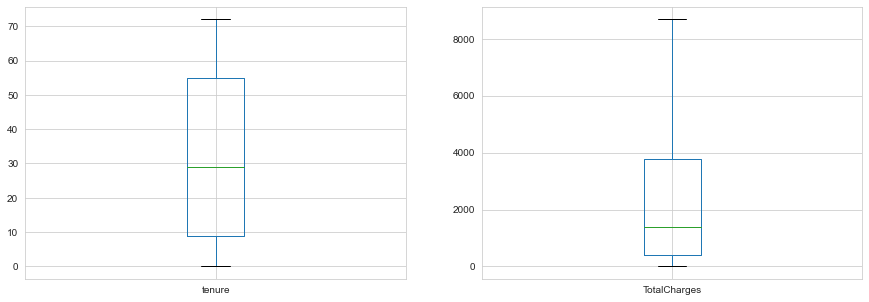

In [57]:
#Box plot of tenure & total charges
df3.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot() 

[]

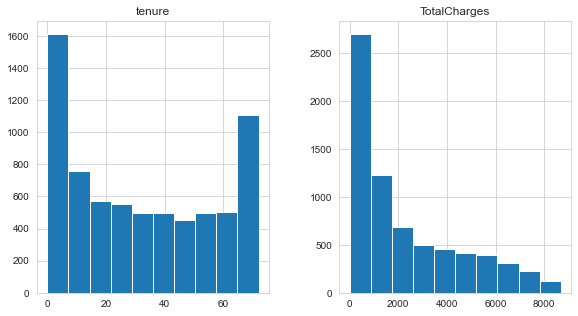

In [58]:
#Histogram plot of tenure & total charges
df3.hist(layout=(1,3), figsize=(15,5))
plt.plot()

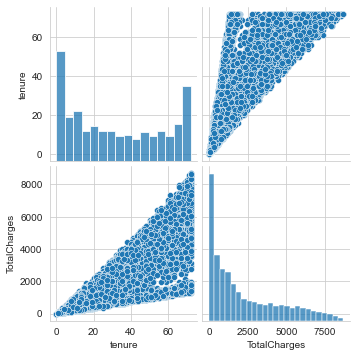

In [59]:
#pairplot of tenure & total charges
sns.pairplot(df3)

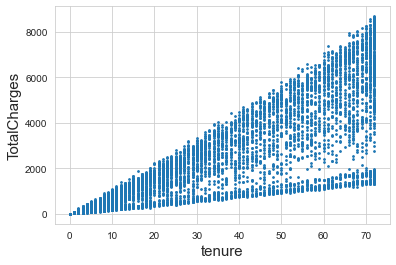

In [60]:
#scatter plot representations of the relationships between TotalCharges and tenure.
plt.figure(figsize=(6,4))
plt.scatter(df3['tenure'],df3['TotalCharges'],s=3)
plt.xlabel('tenure',fontsize=15)
plt.ylabel('TotalCharges',fontsize=15)
plt.show()


Conclusions:

When tenure increases, total charges also increases


**4. Find out which contract preffered by the senior citizen.**

In [13]:
#creating a  data frame with only required columns 
df4=data[['SeniorCitizen','Contract']]

In [14]:
#creating a data frame with only Senior citizens = 1 ie 'yes'
df4_senior=df4.iloc[np.where(df4.SeniorCitizen.values==1)]
df4_senior.head()

,SeniorCitizen,Contract
20,1,Month-to-month
30,1,Two year
31,1,Month-to-month
34,1,Month-to-month
50,1,Month-to-month


In [15]:
df4_senior.value_counts()

SeniorCitizen  Contract      
1              Month-to-month    807
               One year          190
               Two year          145
dtype: int64

<AxesSubplot:>

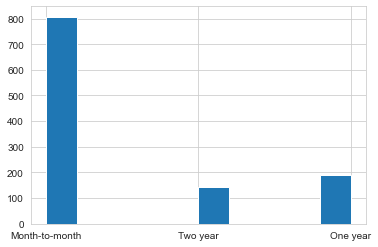

In [65]:
df4_senior['Contract'].hist()

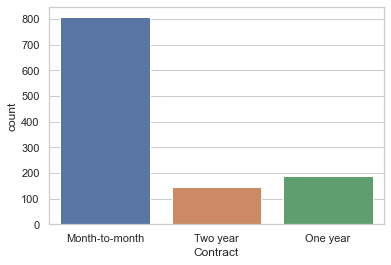

In [66]:
sns.set_theme(style="whitegrid")
sns.countplot(x="Contract", data=df4_senior)
plt.show()

Conclusions:

Month-to-month contract is the contract most preffered by the senior citizens

**5. Comment on your finds on Payment Method?**

<AxesSubplot:>

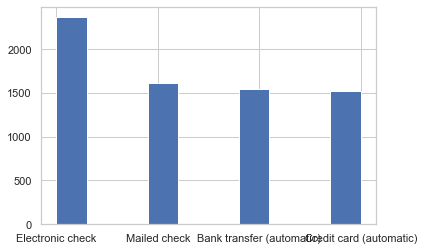

In [67]:
data['PaymentMethod'].hist()

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

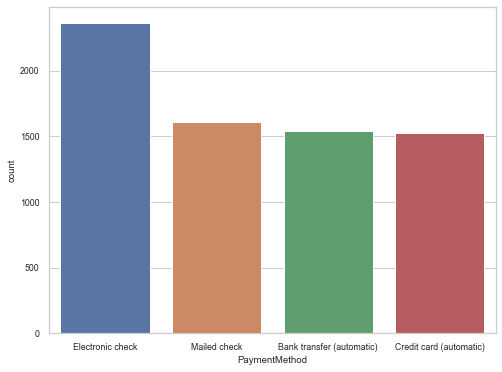

In [68]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid",font_scale = 0.8)
sns.countplot(x="PaymentMethod", data=data)

In [69]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Conclusions:

*  Payment methods used are Electronic check, Mailed check, Bank transfer(automatic) and Credit card (automatic).
*  The most prefered PaymentMethod is ELECTRONIC CHECK.
*  The other PaymentMethods are used relatively in same amount with only slight differences.

In [ ]:
`#submitted by - Shilpa Shibu,Sreelekshmi M K,Roopa Thomas,Kevin M